<a href="https://colab.research.google.com/github/ASQAS71/CANA/blob/main/tempo_execucao_insertion_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação de bibliotecas

In [ ]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install copy
!pip install timeit
!pip install secrets

ERROR: Could not find a version that satisfies the requirement copy (from versions: none)
ERROR: No matching distribution found for copy
ERROR: Could not find a version that satisfies the requirement timeit (from versions: none)
ERROR: No matching distribution found for timeit
  Using cached secrets-1.0.2-py3-none-any.whl
  Using cached configobj-5.0.8-py2.py3-none-any.whl (36 kB)
  Using cached python-ldap-3.4.3.tar.gz (377 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached systematic-4.8.7-py3-none-any.whl (83 kB)
  Using cached python_gnupg-0.5.1-py2.py3-none-any.whl (20 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for python-ldap (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for python-ldap
Failed to b

In [ ]:
#Importação de bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from timeit import timeit
import secrets

#Descomente essa célula e reinicie o ambiente de execução caso você prefira os números em notação científica

In [ ]:
# pd.set_option('display.float_format', '{:.2e}'.format)

#Implementação do algoritmo insertSort

In [ ]:
def insertSort(lista: list) -> None:
    for index_comparable in range(1, len(lista)):
        key = lista[index_comparable]
        index_to_compare_with = index_comparable - 1
        while index_to_compare_with >= 0 and lista[index_to_compare_with] > key:
            lista[index_to_compare_with + 1] = lista[index_to_compare_with]
            index_to_compare_with -= 1
        lista[index_to_compare_with + 1] = key

#Funções auxiliares

In [ ]:
def generate_random_list(length: int, max_val: int) -> list:
    return [secrets.randbelow(max_val) for _ in range(length)]


def getOrderedList(array: list) -> list:
    copia = deepcopy(array)
    insertSort(copia)
    return copia

#Geração dos casos

In [ ]:
melhor_caso = [i for i in range(10)]
pior_caso = [i for i in range(10, 0, -1)]

casos_tipicos = [generate_random_list(10, 11) for _ in range(25)]

#Geração da lista de objetos para criação posteriora do dataframe

In [ ]:
dados = [
    {
        "Caso": "Melhor",
        "Lista não tratada": melhor_caso,
        "Lista tratada": getOrderedList(melhor_caso),
        "Tempo de 10 mil execuções (segundos)": timeit(lambda: insertSort(melhor_caso[:]), number=10000),
        "Tempo de 100 mil execuções (segundos)": timeit(lambda: insertSort(melhor_caso[:]), number=100000),
        "Tempo de 1 milhão execuções (segundos)": timeit(lambda: insertSort(melhor_caso[:]), number=1000000)
    },
    {
        "Caso": "Pior",
        "Lista não tratada": pior_caso,
        "Lista tratada": getOrderedList(pior_caso),
        "Tempo de 10 mil execuções (segundos)": timeit(lambda: insertSort(pior_caso[:]), number=10000),
        "Tempo de 100 mil execuções (segundos)": timeit(lambda: insertSort(pior_caso[:]), number=100000),
        "Tempo de 1 milhão execuções (segundos)": timeit(lambda: insertSort(pior_caso[:]), number=1000000)
    }
]

for index, caso in enumerate(casos_tipicos, 1):
    while caso == melhor_caso or caso == pior_caso:
        caso = generate_random_list(10, 11)

    dados.append({
        "Caso": f"Típico",
        "Lista não tratada": caso,
        "Lista tratada": getOrderedList(caso),
        "Tempo de 10 mil execuções (segundos)": timeit(lambda: insertSort(caso[:]), number=10000),
        "Tempo de 100 mil execuções (segundos)": timeit(lambda: insertSort(caso[:]), number=100000),
        "Tempo de 1 milhão execuções (segundos)": timeit(lambda: insertSort(caso[:]), number=1000000)
    })

#Criação do dataframe

In [ ]:
df = pd.DataFrame(dados)

df.head(50)

,Caso,Lista não tratada,Lista tratada,Tempo de 10 mil execuções (segundos),Tempo de 100 mil execuções (segundos),Tempo de 1 milhão execuções (segundos)
0,Melhor,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0.035145,0.263591,5.914749
1,Pior,"[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.537984,3.451278,33.337195
2,Típico,"[6, 10, 10, 2, 2, 4, 8, 2, 7, 4]","[2, 2, 2, 4, 4, 6, 7, 8, 10, 10]",0.130897,0.910654,7.829023
3,Típico,"[8, 1, 4, 6, 0, 0, 1, 9, 6, 1]","[0, 0, 1, 1, 1, 4, 6, 6, 8, 9]",0.052144,0.532760,5.375666
4,Típico,"[9, 6, 8, 7, 1, 1, 8, 4, 3, 5]","[1, 1, 3, 4, 5, 6, 7, 8, 8, 9]",0.064701,0.719462,8.675860
5,Típico,"[7, 3, 0, 4, 1, 2, 9, 7, 5, 0]","[0, 0, 1, 2, 3, 4, 5, 7, 7, 9]",0.053000,0.535484,6.345281
6,Típico,"[8, 2, 10, 10, 1, 9, 5, 6, 2, 5]","[1, 2, 2, 5, 5, 6, 8, 9, 10, 10]",0.124347,1.268292,6.572643
7,Típico,"[5, 1, 10, 10, 7, 4, 3, 6, 6, 0]","[0, 1, 3, 4, 5, 6, 6, 7, 10, 10]",0.060298,0.623920,8.274774
8,Típico,"[2, 9, 6, 9, 5, 5, 6, 3, 8, 9]","[2, 3, 5, 5, 6, 6, 8, 9, 9, 9]",0.046971,0.477435,4.722467
9,Típico,"[3, 4, 3, 2, 2, 5, 1, 4, 4, 2]","[1, 2, 2, 2, 3, 3, 4, 4, 4, 5]",0.052208,0.530781,7.120800


#Adição da coluna tempo de execução médio

In [ ]:
# Criação de colunas temporárias que calculam o tempo médio por execução para cada coluna
df["Tempo médio (10 mil)"] = df["Tempo de 10 mil execuções (segundos)"] / 10_000
df["Tempo médio (100 mil)"] = df["Tempo de 100 mil execuções (segundos)"] / 100_000
df["Tempo médio (1 milhão)"] = df["Tempo de 1 milhão execuções (segundos)"] / 1_000_000

# Calcular a média desses tempos para criar a nova coluna
df["Tempo de execução médio"] = df[["Tempo médio (10 mil)", "Tempo médio (100 mil)", "Tempo médio (1 milhão)"]].mean(axis=1)

# Drop das colunas temporárias
df = df.drop(columns=["Tempo médio (10 mil)", "Tempo médio (100 mil)", "Tempo médio (1 milhão)"])

df.head(50)

,Caso,Lista não tratada,Lista tratada,Tempo de 10 mil execuções (segundos),Tempo de 100 mil execuções (segundos),Tempo de 1 milhão execuções (segundos),Tempo de execução médio
0,Melhor,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0.035145,0.263591,5.914749,0.000004
1,Pior,"[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.537984,3.451278,33.337195,0.000041
2,Típico,"[6, 10, 10, 2, 2, 4, 8, 2, 7, 4]","[2, 2, 2, 4, 4, 6, 7, 8, 10, 10]",0.130897,0.910654,7.829023,0.000010
3,Típico,"[8, 1, 4, 6, 0, 0, 1, 9, 6, 1]","[0, 0, 1, 1, 1, 4, 6, 6, 8, 9]",0.052144,0.532760,5.375666,0.000005
4,Típico,"[9, 6, 8, 7, 1, 1, 8, 4, 3, 5]","[1, 1, 3, 4, 5, 6, 7, 8, 8, 9]",0.064701,0.719462,8.675860,0.000007
5,Típico,"[7, 3, 0, 4, 1, 2, 9, 7, 5, 0]","[0, 0, 1, 2, 3, 4, 5, 7, 7, 9]",0.053000,0.535484,6.345281,0.000006
6,Típico,"[8, 2, 10, 10, 1, 9, 5, 6, 2, 5]","[1, 2, 2, 5, 5, 6, 8, 9, 10, 10]",0.124347,1.268292,6.572643,0.000011
7,Típico,"[5, 1, 10, 10, 7, 4, 3, 6, 6, 0]","[0, 1, 3, 4, 5, 6, 6, 7, 10, 10]",0.060298,0.623920,8.274774,0.000007
8,Típico,"[2, 9, 6, 9, 5, 5, 6, 3, 8, 9]","[2, 3, 5, 5, 6, 6, 8, 9, 9, 9]",0.046971,0.477435,4.722467,0.000005
9,Típico,"[3, 4, 3, 2, 2, 5, 1, 4, 4, 2]","[1, 2, 2, 2, 3, 3, 4, 4, 4, 5]",0.052208,0.530781,7.120800,0.000006


#Criação do excel

In [ ]:
nome_arquivo = "execucao_insertion_sort.xlsx"
df.to_excel(nome_arquivo, engine='openpyxl')

#Criação de uma versão simplificada do dataframe

In [ ]:
df_simplificado = df.drop(columns=["Lista não tratada", "Lista tratada"])

df_simplificado.head(50)

,Caso,Tempo de 10 mil execuções (segundos),Tempo de 100 mil execuções (segundos),Tempo de 1 milhão execuções (segundos),Tempo de execução médio
0,Melhor,0.035145,0.263591,5.914749,0.000004
1,Pior,0.537984,3.451278,33.337195,0.000041
2,Típico,0.130897,0.910654,7.829023,0.000010
3,Típico,0.052144,0.532760,5.375666,0.000005
4,Típico,0.064701,0.719462,8.675860,0.000007
5,Típico,0.053000,0.535484,6.345281,0.000006
6,Típico,0.124347,1.268292,6.572643,0.000011
7,Típico,0.060298,0.623920,8.274774,0.000007
8,Típico,0.046971,0.477435,4.722467,0.000005
9,Típico,0.052208,0.530781,7.120800,0.000006


#Transformar o dataframe simplificado em um excel

In [ ]:
nome_arquivo = "execucao_insertion_sort_simplificado.xlsx"
df_simplificado.to_excel(nome_arquivo, engine='openpyxl')

#Gráfico de colunas: Média dos Tempos de 1 milhão de execuções por Caso

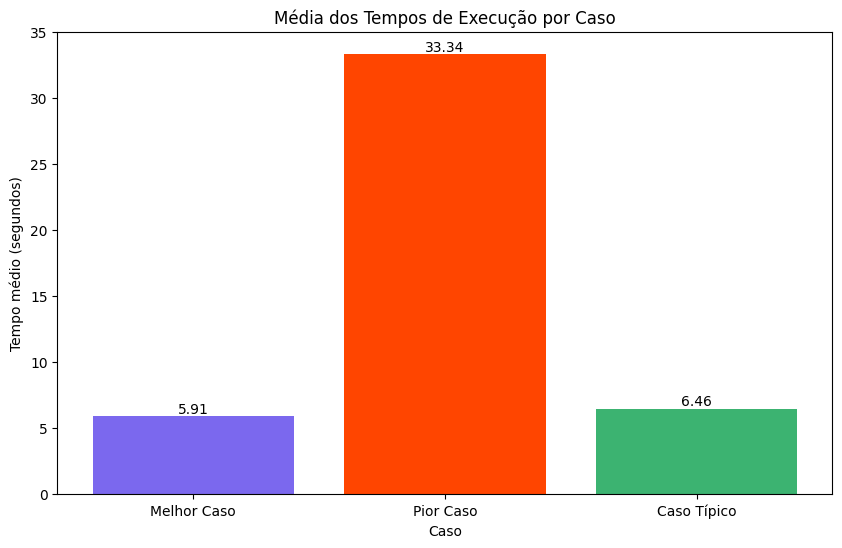

In [ ]:
# Filtrando o dataframe para obter as médias por caso
media_melhor_caso = df[df['Caso'] == 'Melhor']['Tempo de 1 milhão execuções (segundos)'].mean()
media_pior_caso = df[df['Caso'] == 'Pior']['Tempo de 1 milhão execuções (segundos)'].mean()
media_tipico = df[df['Caso'].str.contains('Típico')]['Tempo de 1 milhão execuções (segundos)'].mean()

# Defina os rótulos e valores
labels = ['Melhor Caso', 'Pior Caso', 'Caso Típico']
values = [media_melhor_caso, media_pior_caso, media_tipico]

plt.figure(figsize=(10,6))
bars = plt.bar(labels, values, color=['MediumSlateBlue', 'OrangeRed', 'MediumSeaGreen'])

# Adicionando título e labels aos eixos
plt.title('Média dos Tempos de Execução por Caso')
plt.xlabel('Caso')
plt.ylabel('Tempo médio (segundos)')

# Mostra os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

plt.show()